<a href="https://colab.research.google.com/github/rezajkiani/CS-SBU-DataMining-Msc-projects/blob/main/reza%20jamshidkiani-98422044%5CProjects1%5Cp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive');
! ls '/content/gdrive/MyDrive/Data Mining/'
root = '/content/gdrive/MyDrive/Data Mining/'
rb = pd.read_csv(root+"AB_NYC_2019.csv")
rb.head()

rb.isnull().sum()
rb.duplicated().value_counts()
rb.columns
rb.drop(['id', 'name', 'host_id', 'host_name',
         'last_review'], inplace=True, axis=1)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
AB_NYC_2019.csv  footbahll2017.csv  results.csv


In [ ]:
#corrrelation    = rb.corr(method="spearman");
#print("Spearman rank correlation:");
#print(corrrelation);
scipy.stats.spearmanr(rb['price'], rb['minimum_nights'])

SpearmanrResult(correlation=0.10128900445001728, pvalue=1.1582087858911544e-111)

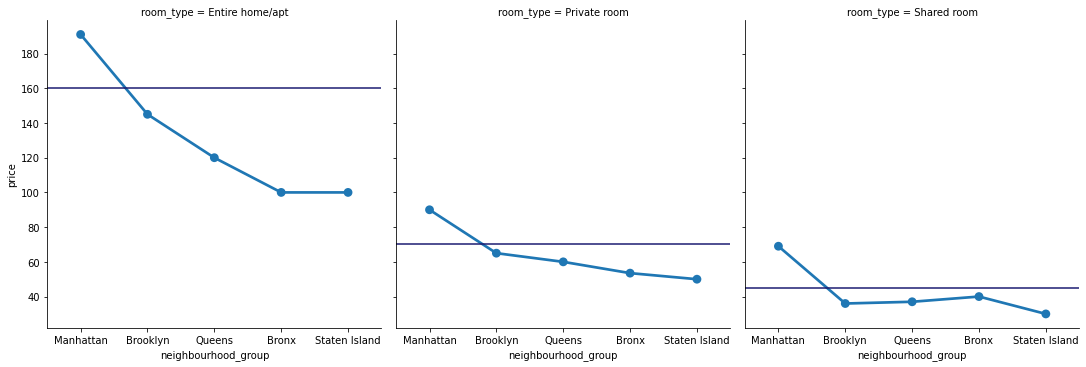

In [ ]:
avg_roomtype_cost = rb.groupby('room_type').price.median()
top_price = rb.groupby(['neighbourhood_group', 'room_type']).median(
).sort_values(by='price', ascending=False).reset_index()
g = sns.catplot(x='neighbourhood_group', y='price', data=top_price,
                ci=False, estimator=np.median, kind='point', col='room_type')
for i in range(len(avg_roomtype_cost)):
    g.axes[0][i].axhline(avg_roomtype_cost[i], color='midnightblue')
plt.show()

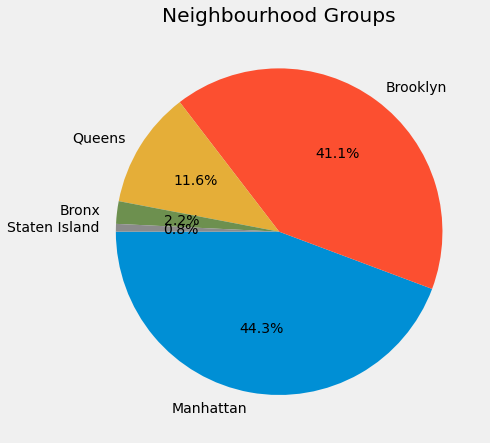

In [ ]:

plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
plt.title("Neighbourhood Groups")
g = plt.pie(rb.neighbourhood_group.value_counts(
), labels=rb.neighbourhood_group.value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()
plt.close()

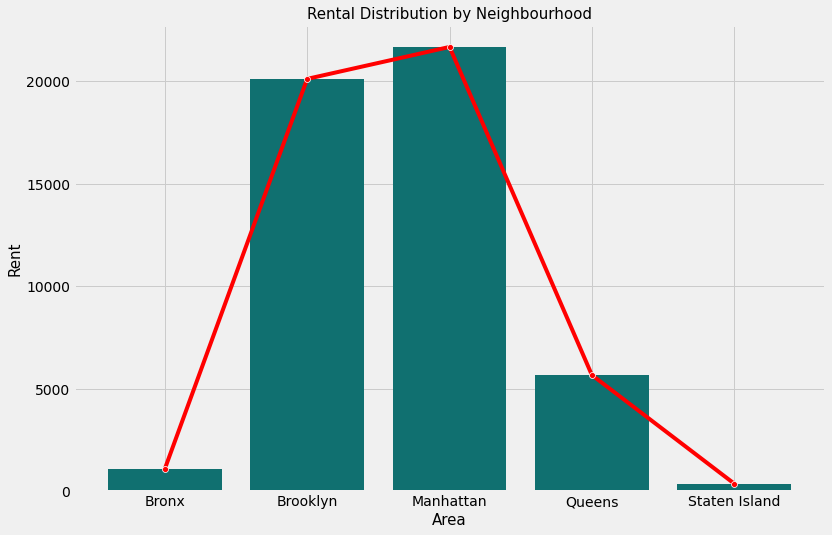

In [ ]:
neighbourhood = rb.groupby('neighbourhood_group')[
    'neighbourhood'].count().reset_index()
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=neighbourhood[neighbourhood.columns[0]],
            y=neighbourhood[neighbourhood.columns[1]], color='teal', ax=ax)
sns.lineplot(x=neighbourhood[neighbourhood.columns[0]],
             y=neighbourhood[neighbourhood.columns[1]], color='r', marker='o', ax=ax)
plt.ylabel('Rent', fontsize='15')
plt.xlabel('Area', fontsize='15')
plt.title('Rental Distribution by Neighbourhood', fontsize='15')
plt.grid('x')
plt.show()
sns.set()

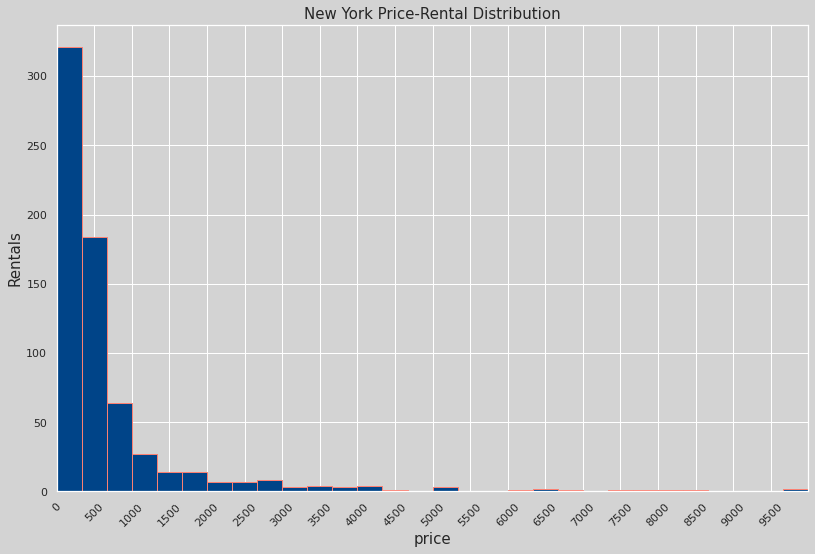

In [ ]:
price = rb.loc[:, ['neighbourhood', 'price']].set_index('neighbourhood')
price_stats = rb['price'].describe().reset_index()
price_counts = price.price.value_counts().reset_index()
price_counts.rename(columns={'index': 'price', 'price': 'count'}, inplace=True)
fig2, ax = plt.subplots(figsize=(12, 8))
fig2.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')
plt.hist(price_counts['price'], bins=30, color='#004488', edgecolor='salmon')
ax.set_xticks(range(0, 10000, 500))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.xlabel('price', fontsize='15')
plt.ylabel('Rentals', fontsize='15')
plt.xlim((-0.5, 10000))
plt.title('New York Price-Rental Distribution', fontsize='15')
plt.show()

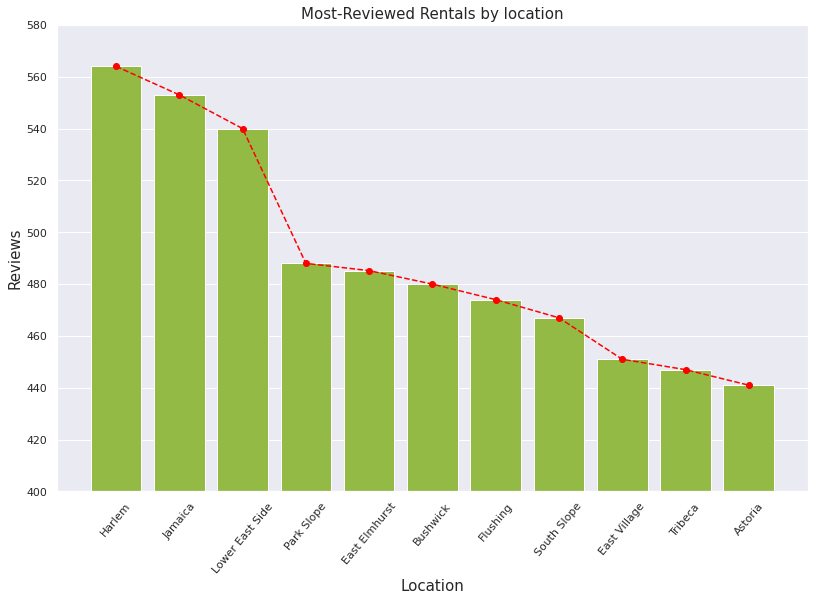

In [ ]:
review = rb.sort_values('number_of_reviews', ascending=False)
top_reviewed = review.loc[:, ['neighbourhood', 'number_of_reviews']][:20]
top_reviewed = top_reviewed.groupby('neighbourhood').mean().sort_values(
    'number_of_reviews', ascending=False).reset_index()
fig4, ax3 = plt.subplots(figsize=(12, 8))
sns.barplot(x=top_reviewed['neighbourhood'],
            y=top_reviewed['number_of_reviews'].values, color='yellowgreen', ax=ax3)
plt.plot(top_reviewed['number_of_reviews'],
         marker='o', color='red', linestyle='--')
plt.ylabel('Reviews', fontsize='15')
plt.xlabel('Location', fontsize='15')
plt.ylim((400, 580))
for ax in ax3.get_xticklabels():
    ax.set_rotation(50)
plt.title('Most-Reviewed Rentals by location', fontsize='15')
plt.show()
sns.set()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


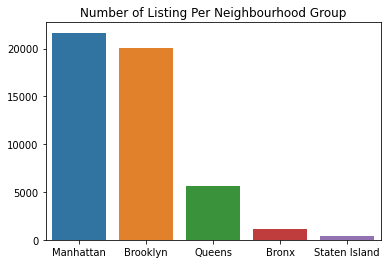

Avg Price of Neighbourhood Group Brooklyn: 57.42877835024624
Avg Price of Neighbourhood Group Manhattan: 86.94598085173197
Avg Price of Neighbourhood Group Queens: 55.30723215856462
Avg Price of Neighbourhood Group Staten Island: 65.94196326984459
Avg Price of Neighbourhood Group Bronx: 50.70361009604071


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


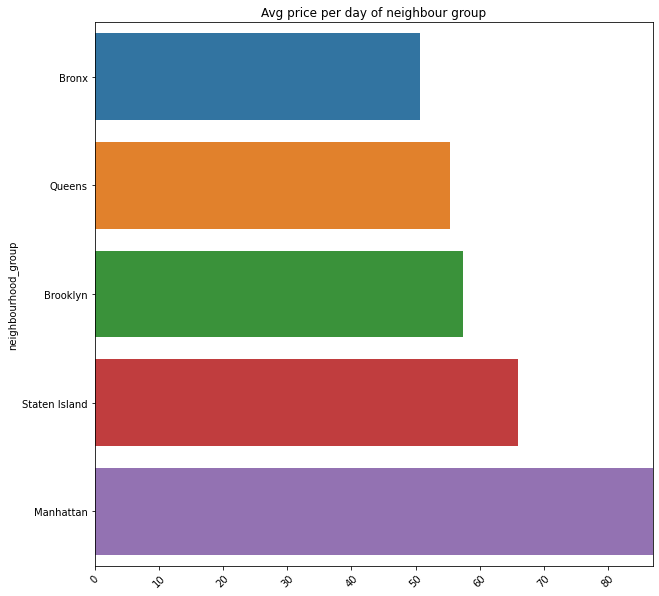

In [ ]:
rb["price_per_day"] = rb["price"]/rb["minimum_nights"]
rb["Neighbour"] = rb["neighbourhood"].astype(str)+"_"+rb["neighbourhood_group"].astype(str)
sns.barplot(rb["neighbourhood_group"].value_counts().index, rb["neighbourhood_group"].value_counts().values)
plt.title("Number of Listing Per Neighbourhood Group")
plt.show()
for ng in rb["neighbourhood_group"].unique():
  print(f'Avg Price of Neighbourhood Group {ng}: {rb[rb["neighbourhood_group"]==ng]["price_per_day"].sum()/len(rb[rb["neighbourhood_group"]==ng])}')

grp_neighbour = rb.groupby("neighbourhood_group")["price_per_day"].mean().sort_values()
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
plt.xlim(0,max(grp_neighbour.values))
sns.barplot(grp_neighbour.values,grp_neighbour.index)
plt.title("Avg price per day of neighbour group")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


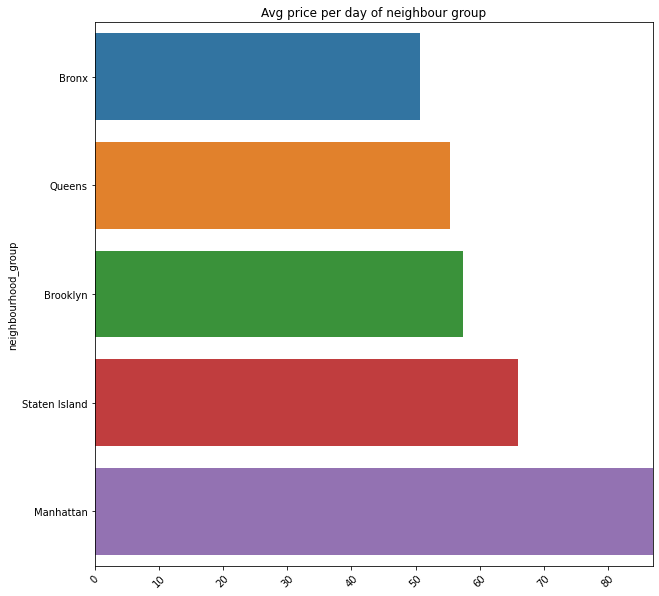

In [ ]:
grp_neighbour = rb.groupby("neighbourhood_group")["price_per_day"].mean().sort_values()
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
plt.xlim(0,max(grp_neighbour.values))
sns.barplot(grp_neighbour.values,grp_neighbour.index)
plt.title("Avg price per day of neighbour group")
plt.show()


/home/aminjs/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


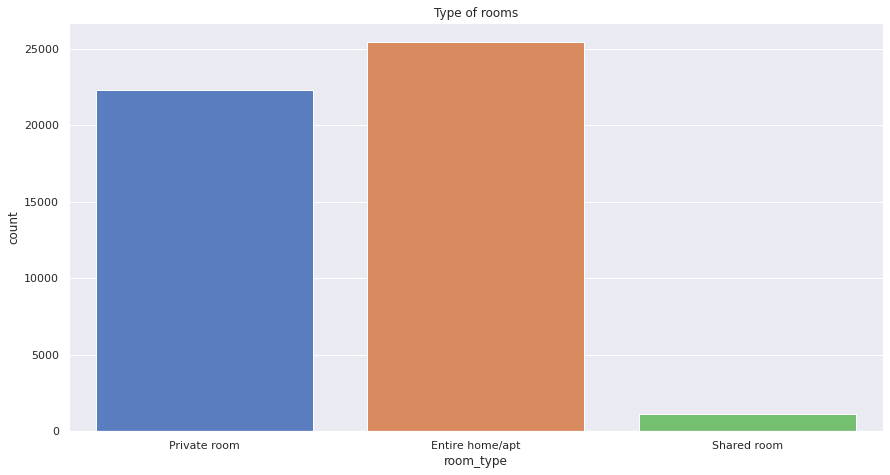

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Type of rooms")
sns.countplot(rb.room_type,palette="muted")
fig=plt.gcf()
plt.show()

/home/aminjs/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


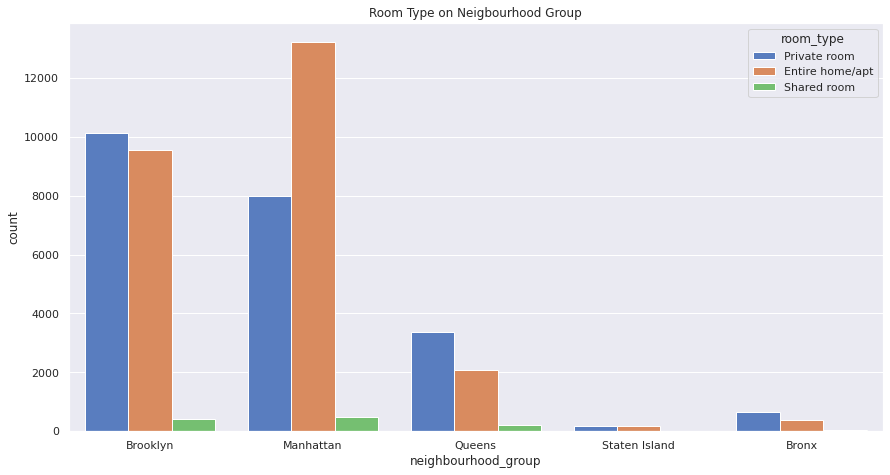

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neigbourhood Group")
sns.countplot(rb.neighbourhood_group,hue=rb.room_type,palette="muted")
plt.show()

/home/aminjs/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aminjs/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


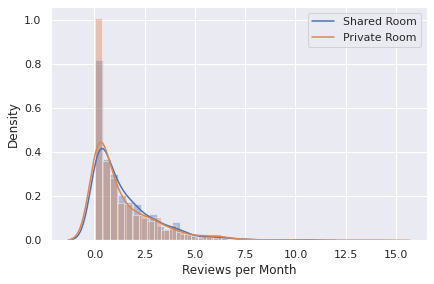

(607492.0, '0.00002580171171316850')

In [ ]:
shared_rooms=rb.loc[rb.room_type ==
    'Shared room']['reviews_per_month'].values.tolist()
private_rooms=rb.loc[rb.room_type == 'Private room'].sample(len(
    shared_rooms), replace=False, random_state=1)['reviews_per_month'].values.tolist()

sns.distplot(shared_rooms)
sns.distplot(private_rooms)
plt.xlabel('Reviews per Month')
plt.legend(['Shared Room', 'Private Room'])
plt.show()
def mann_whitney_u_test(d1, d2):
    u_stat, p_val=ss.mannwhitneyu(d1, d2)
    return u_stat, f'{p_val:.20f}'
mann_whitney_u_test(shared_rooms, private_rooms)